In [1]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Zero-Shot Results

In [2]:
zero_df1 = pd.read_csv('/kaggle/input/deepseekresults/deepseek_test_df1_zeroshot_results.csv')

In [3]:
zero_df2 = pd.read_csv('/kaggle/input/deepseekresults/deepseek_test_df2_zeroshot_results.csv')

In [4]:
zero_results_df = pd.concat([zero_df1,zero_df2])
zero_results_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0.1,Unnamed: 0,premise,hypothesis,gold_label,type,Predicted - Zero-Shot DeepSeek,message
0,0,9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive,N,NaN
1,1,9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive,N,NaN
2,2,9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive,N,NaN
3,3,9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive,N,NaN
4,4,9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive,N,NaN
...,...,...,...,...,...,...,...,...
1179,1179,NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive,N,{'content': '\n Does the premise entail...
1180,1180,NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive,d,"{'content': ""\n Does the premise entail..."
1181,1181,NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive,N,{'content': '\n Does the premise entail...
1182,1182,NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive,N,{'content': '\n Does the premise entail...


In [5]:
zero_results_df['gold_label'].value_counts()

gold_label
N    879
C    768
E    720
Name: count, dtype: int64

In [6]:
zero_results_df['Predicted - Zero-Shot DeepSeek'].value_counts()

Predicted - Zero-Shot DeepSeek
N     1811
C      259
E      241
t       12
e       10
s        8
.        5
,        5
d        3
n        3
g        2
P        2
r        2
\n       1
y        1
B        1
Q        1
Name: count, dtype: int64

In [7]:
zero_results_df['Predicted - Zero-Shot DeepSeek'] =  zero_results_df['Predicted - Zero-Shot DeepSeek'].apply(lambda x: x if x in ['N', 'E', 'C'] else np.nan)
zero_results_df['Predicted - Zero-Shot DeepSeek'].value_counts()

Predicted - Zero-Shot DeepSeek
N    1811
C     259
E     241
Name: count, dtype: int64

In [8]:
zero_results_filtered_df = zero_results_df.dropna(subset=['Predicted - Zero-Shot DeepSeek'])
zero_results_filtered_df['Predicted - Zero-Shot DeepSeek'].value_counts()

Predicted - Zero-Shot DeepSeek
N    1811
C     259
E     241
Name: count, dtype: int64

In [9]:
zero_results_filtered_df['gold_label'].unique()

array(['E', 'N', 'C'], dtype=object)

In [10]:
zero_results_filtered_df['Predicted - Zero-Shot DeepSeek'].unique()

array(['N', 'C', 'E'], dtype=object)

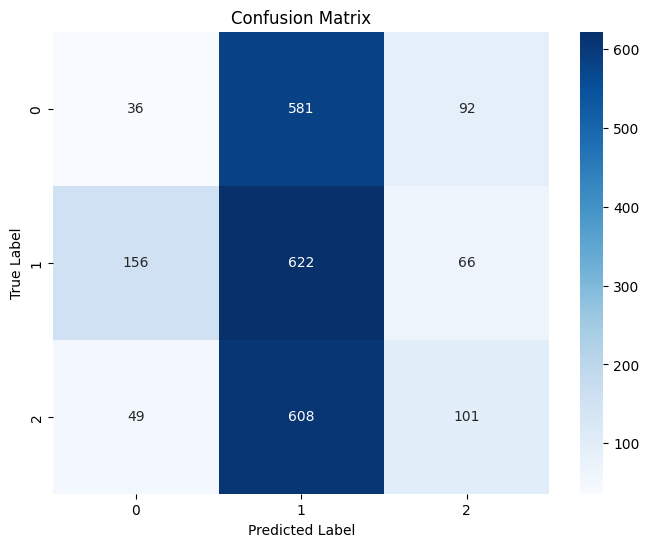

In [11]:
# Create the testing confusion matrix
cm = confusion_matrix(zero_results_filtered_df['gold_label'], zero_results_filtered_df['Predicted - Zero-Shot DeepSeek'],labels=['E','N','C'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
report_dict = classification_report(zero_results_filtered_df['gold_label'], zero_results_filtered_df['Predicted - Zero-Shot DeepSeek'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose() 
report_df.columns.name = 'label'
report_df

label,precision,recall,f1-score,support
C,0.389961,0.133245,0.198623,758.000000
E,0.149378,0.050776,0.075789,709.000000
N,0.343457,0.736967,0.468550,844.000000
accuracy,0.328429,0.328429,0.328429,0.328429
macro avg,0.294265,0.306996,0.247654,2311.000000
weighted avg,0.299168,0.328429,0.259519,2311.000000


In [13]:
def compute_metrics_by_type(group):
    predictions = group['gold_label']
    labels = group[predicted_col]
    acc = np.mean(predictions == labels)
    precision = precision_score(labels, predictions,average="weighted")
    recall = recall_score(labels, predictions,average="weighted")
    f1 = f1_score(labels, predictions,average="weighted")
    return pd.Series({'accuracy': round(acc,2), 'precision': round(precision,2), 'recall': round(recall,2), 'f1_score': round(f1,2)})

In [14]:
predicted_col = 'Predicted - Zero-Shot DeepSeek'
metrics_by_type = zero_results_filtered_df.groupby('type').apply(compute_metrics_by_type).reset_index()
metrics_by_type.columns.name = 'ID'
metrics_by_type

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

ID,type,accuracy,precision,recall,f1_score
0,type1_again,0.41,0.41,0.41,0.40
1,type1_possessive,0.49,0.53,0.49,0.49
2,type2_again,0.50,0.53,0.50,0.50
3,type2_possessive,0.53,0.66,0.53,0.57
4,type3_again,0.46,0.61,0.46,0.50
5,type3_possessive,0.58,0.75,0.58,0.64
6,type4_possessive,0.27,0.53,0.27,0.34
7,type5_again,0.11,0.69,0.11,0.09
8,type5_possessive,0.08,0.80,0.08,0.07
